In [203]:
# Importing and basic utility cell
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
%matplotlib inline
!pip install datascience 
from datascience import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [204]:
# Read in Data
raw_Education = pd.read_excel('Education.xls',header = 4)
raw_PopulationEstimates = pd.read_excel('PopulationEstimates.xls',header = 2)
raw_PovertyEstimates = pd.read_excel('PovertyEstimates.xls',header = 3)
raw_Unemployment = pd.read_excel('Unemployment.xls',header = 9)
raw_financial_aid = pd.read_excel('FinancialAidByLocation.xls',header = 4)

#Filtering Data
filtered_education = raw_Education[raw_Education['Area_Name'].isin(states.values())]\
                                .dropna(axis = 1).drop(335)
filtered_population_estimates = raw_PopulationEstimates[raw_PopulationEstimates['Area_Name'].isin(states.values())]\
                                .dropna(axis = 1).drop(328)
filtered_poverty_estimate = raw_PovertyEstimates[raw_PovertyEstimates['Area_Name'].isin(states.values())]\
                            .dropna(axis = 1).drop(328)
filtered_unemployment = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())]\
                                .dropna(axis = 1).drop(330)
    
filtered_financial_aid = raw_financial_aid[['Location','Disbursements                                        (in millions).1',\
                   'Recipients                                              (in thousands).1']].\
                    rename(columns = \
                           {'Disbursements                                        (in millions).1':'Disbursements',\
                            'Recipients                                              (in thousands).1':'Recepient'})\
                    [raw_financial_aid['Location'].isin(states.values())]
        
# putting into the Datascience Table format
education_raw = Table.from_df(filtered_education)
population_estimate_raw = Table.from_df(filtered_population_estimates)
poverty_estimates_raw = Table.from_df(filtered_poverty_estimate)
unemployment_raw = Table.from_df(filtered_unemployment)
financial_aid_raw = Table.from_df(filtered_financial_aid)

# Overall Dataset
overall = education_raw.join('Area_Name',population_estimate_raw,'Area_Name').\
        join('Area_Name',poverty_estimates_raw,'Area_Name').\
        join('Area_Name',unemployment_raw.\
             drop(['Rural-urban_Continuum_Code_2003',
                   'Urban_Influence_Code_2003',
                   'Rural-urban_Continuum_Code_2013',
                   'Urban_Influence_Code_2013']),
             'Area_name').\
        join('Area_Name',financial_aid_raw,'Location')
        


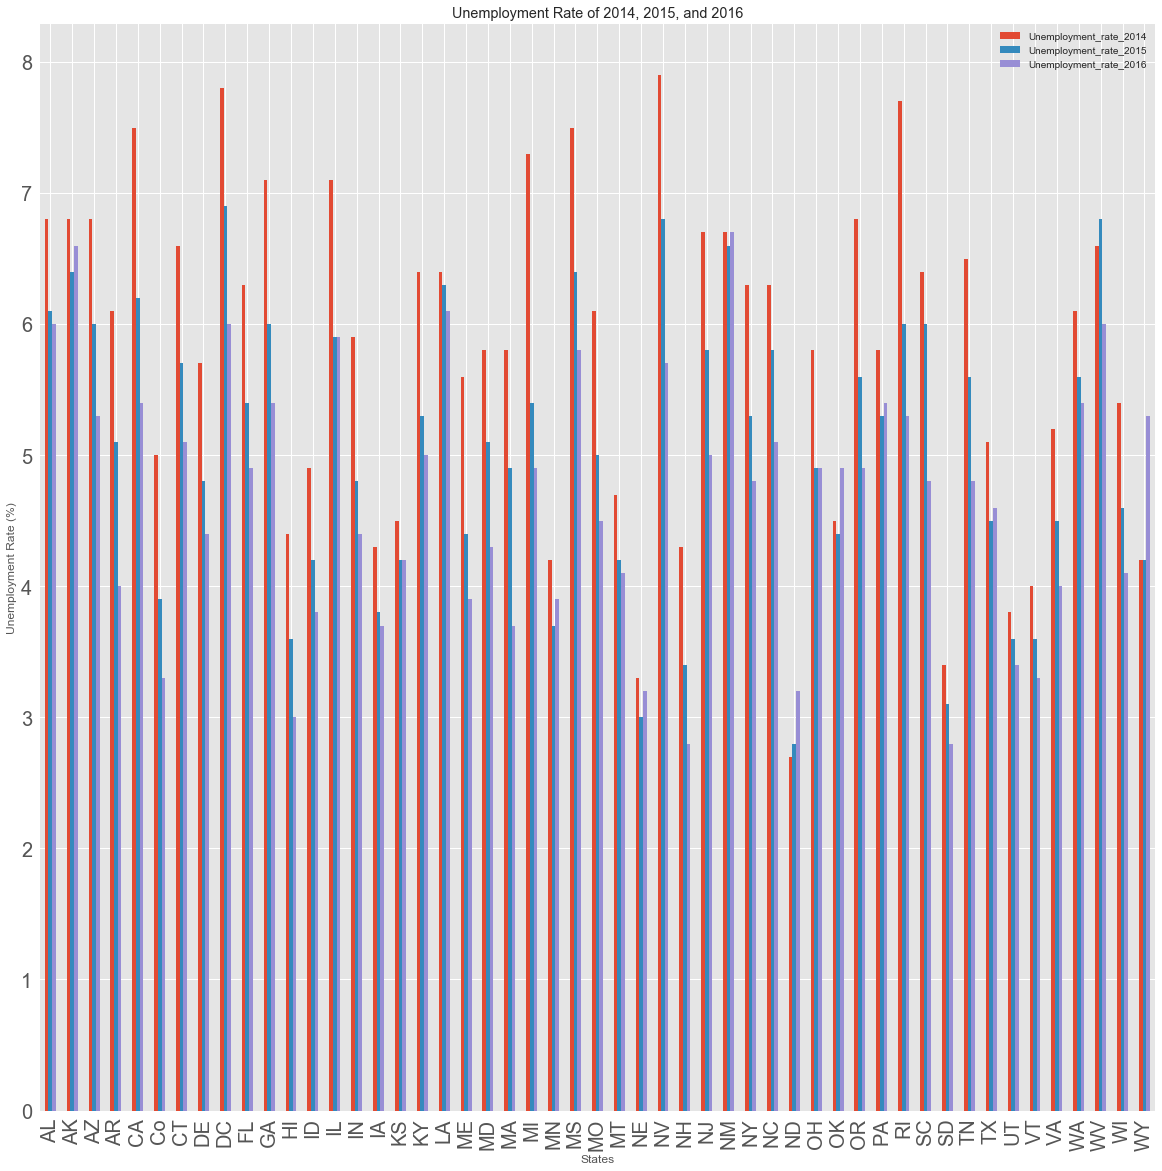

In [205]:
# Plotting unemployment rate for year 2014, 2015, 2016
#filtered_unemployment = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())].drop(['Rural_urban_continuum_code_2013','Urban_influence_code_2013','Metro_2013'],axis = 1)
unemployment_rate_2014_2015_2016 = filtered_unemployment[['State',
                                                      'Unemployment_rate_2014',
                                                      'Unemployment_rate_2015',
                                                      'Unemployment_rate_2016']]
unemployment_rate_2014_2015_2016_plot = unemployment_rate_2014_2015_2016.plot.bar(figsize = (20,20),
                                               x = unemployment_rate_2014_2015_2016['State'],
                                               title = 'Unemployment Rate of 2014, 2015, and 2016',
                                               fontsize = 20)

unemployment_rate_2014_2015_2016_plot.set_ylabel('Unemployment Rate (%)')
unemployment_rate_2014_2015_2016_plot.set_xlabel('States')


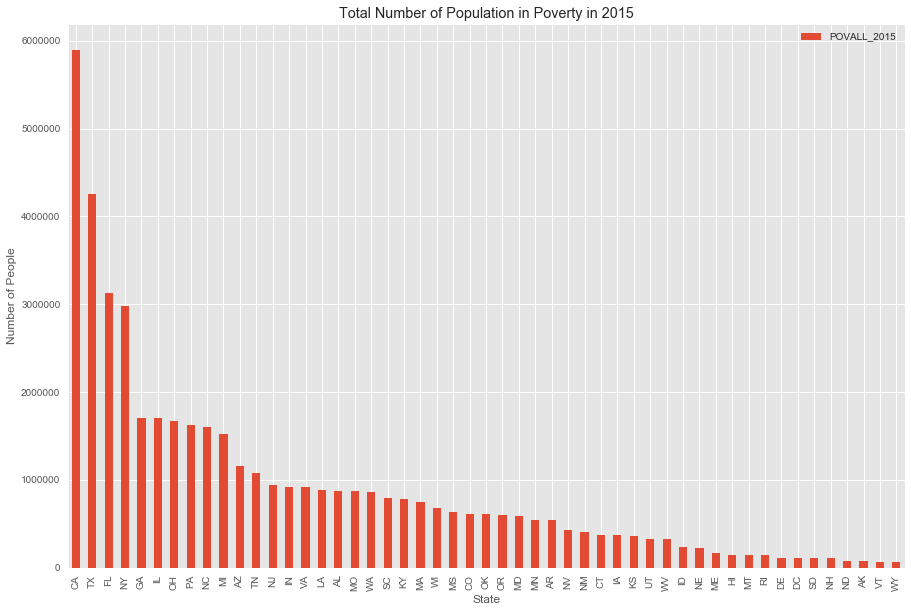

In [206]:
cleaned_sort_by_states = filtered_poverty_estimate.drop(filtered_poverty_estimate.columns[[0,3,4,5,6,]],axis = 1)
selected = cleaned_sort_by_states[['State','POVALL_2015','CI90LBAll_2015','CI90UBALL_2015']].sort_values(by = "POVALL_2015",ascending = False)
pov_in_2015 = selected[['State','POVALL_2015']].plot(x = "State", kind = 'bar',figsize=(15,10),title = 'Total Number of Population in Poverty in 2015')
pov_in_2015.set_ylabel('Number of People')

#education_raw 
#population_estimate_raw 
#poverty_estimates_raw 
#unemployment_raw 
#financial_aid_raw 

In [207]:
t = Table().with_columns('State',overall.column('Area_Name'),
                     '%_adults_<_high_school_edu', 
                         overall.column('Percent of adults with less than a high school diploma, 2011-2015'),   
                     '%_poverty',overall.column('PCTPOVALL_2015'),
                     '%_unemployment',overall.column('Unemployment_rate_2015'),
                     '%_individual_/_state_total * 1000',
                         1000* (100*(1e6*overall.column('Disbursements'))/
                         (overall.column('Recepient') * 1e3)/(1e6*overall.column('Disbursements'))))


In [208]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

In [226]:
t.column(0)

array(['California', 'Texas', 'Mississippi', 'New Mexico', 'Kentucky',
       'Alabama', 'Arkansas', 'West Virginia', 'Nevada', 'Georgia',
       'Tennessee', 'South Carolina', 'New York', 'North Carolina',
       'Arizona', 'Rhode Island', 'Oklahoma', 'Florida', 'Indiana',
       'Illinois', 'Virginia', 'Missouri', 'Delaware', 'New Jersey',
       'Ohio', 'Pennsylvania', 'District of Columbia', 'Maryland', 'Idaho',
       'Michigan', 'Oregon', 'Massachusetts', 'Connecticut', 'Kansas',
       'Washington', 'Nebraska', 'Colorado', 'South Dakota', 'Wisconsin',
       'Hawaii', 'Utah', 'Iowa', 'Maine', 'North Dakota', 'Vermont',
       'Alaska', 'Wyoming', 'New Hampshire', 'Minnesota', 'Montana'], 
      dtype='<U20')

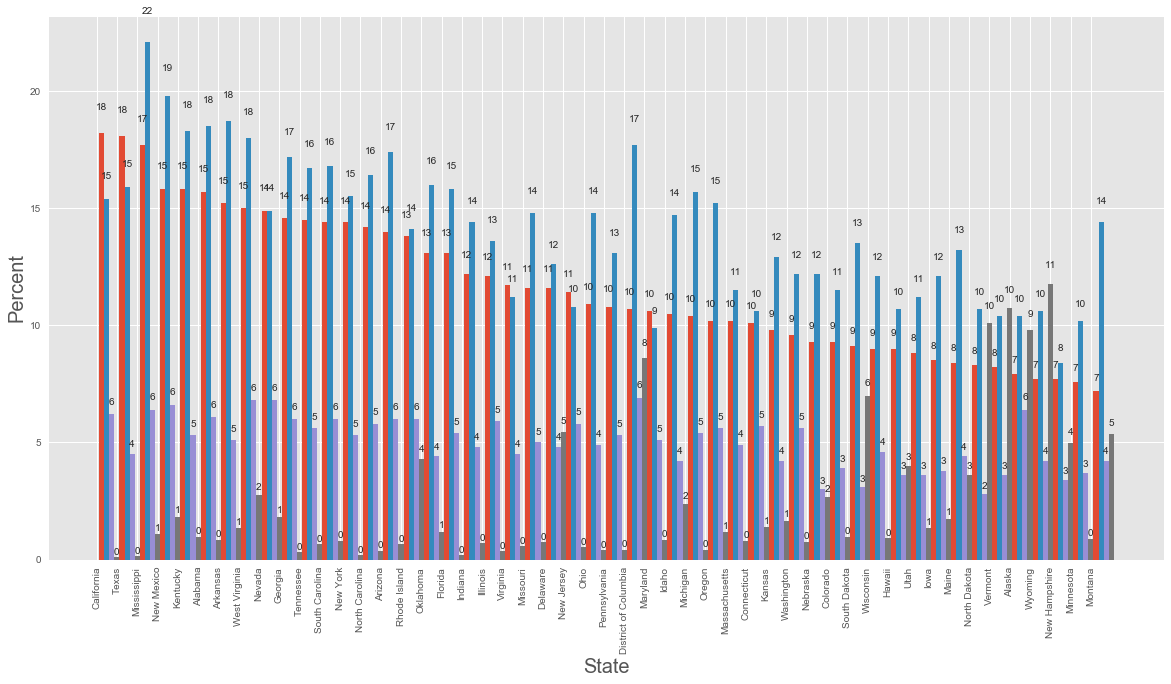

In [234]:
t = t.sort('%_adults_<_high_school_edu',descending = True)
width = 0.25
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
bar_list = []
col_names = t.columns
for col_index in range(t.num_columns):
    if col_index != 0:
        current_bar = ax.bar(np.arange(t.num_rows) + width * col_index, 
                           t.column(col_index),
                           width)   
        bar_list.append(current_bar)

for index in range(len(bar_list)):
    autolabel(bar_list[index])
    

ax.set_ylabel('Percent',fontsize = 20)
ax.set_xlabel('State',fontsize = 20)
plt.xticks(np.arange(50),t.column(0),rotation = 90)
plt.show()